In [1]:
#Compare magnitude differences in nominally similar filters as a function of redshift
#Focusing on redshift ranges where emission lines move in and out of the filter

In [3]:
#import all the stuff

# -*- coding: utf-8 -*-
%pylab inline
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np
#from astropy.io import fits
from astropy.table import Table
#from scipy.io.idl import readsav
#import math

/home/mubdi/opt/canopy-1.4.1/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


Populating the interactive namespace from numpy and matplotlib


In [17]:
src_file = 'emm_lines_eteq.fits.gz'
all_src = Table.read(src_file)
print 'Read in file'

Read in file


In [8]:
all_src.colnames

['specObjID',
 'ra',
 'dec',
 'z',
 'zErr',
 'class',
 'subClass',
 'EW_OII_3726',
 'EW_OII_3726_Err',
 'Flux_OII_3726',
 'Flux_OII_3726_Err',
 'EW_OII_3728',
 'EW_OII_3728_Err',
 'Flux_OII_3728',
 'Flux_OII_3728_Err',
 'EW_OIII_5006',
 'EW_OIII_5006_Err',
 'Flux_OIII_5006',
 'Flux_OIII_5006_Err',
 'EW_Ha_6562',
 'EW_Ha_6562_Err',
 'Flux_Ha_6562',
 'Flux_Ha_6562_Err',
 'psfMag_u',
 'psfMagErr_u',
 'cModelMag_u',
 'cModelMagErr_u',
 'psfMag_g',
 'psfMagErr_g',
 'cModelMag_g',
 'cModelMagErr_g',
 'psfMag_r',
 'psfMagErr_r',
 'cModelMag_r',
 'cModelMagErr_r',
 'psfMag_i',
 'psfMagErr_i',
 'cModelMag_i',
 'cModelMagErr_i',
 'psfMag_z',
 'psfMagErr_z',
 'cModelMag_z',
 'cModelMagErr_z']

551537


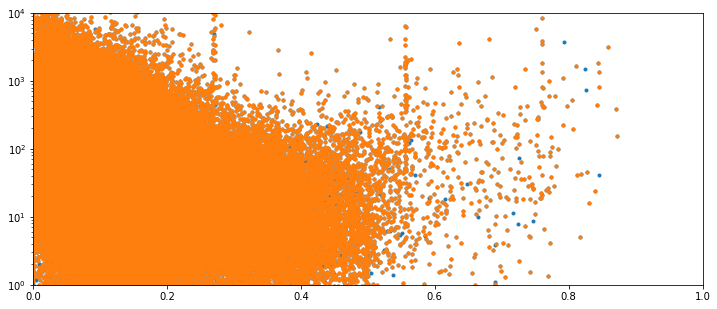

In [52]:
fig = plt.figure(figsize=(12,5))

umag = all_src['psfMag_u']
gmag = all_src['psfMag_g']
rmag = all_src['psfMag_r']

elg = (all_src['psfMag_u'] > 0)*(all_src['psfMag_g'] > 0) * ((umag-gmag) > -0.5) * ((umag-gmag) < 3.5 ) * ((gmag-rmag) > -0.75)*( (gmag-rmag) < 2) 
print np.nansum(elg)

plt.plot(all_src['z'], all_src['Flux_OIII_5006'], '.')
plt.plot(all_src['z'][elg], all_src['Flux_OIII_5006'][elg], '.')
plt.xlim([0,1.0])
plt.ylim([1,1e4])
plt.yscale('log')
#plt.hist(all_src['Flux_OIII_5006'], range=[0,1e2])


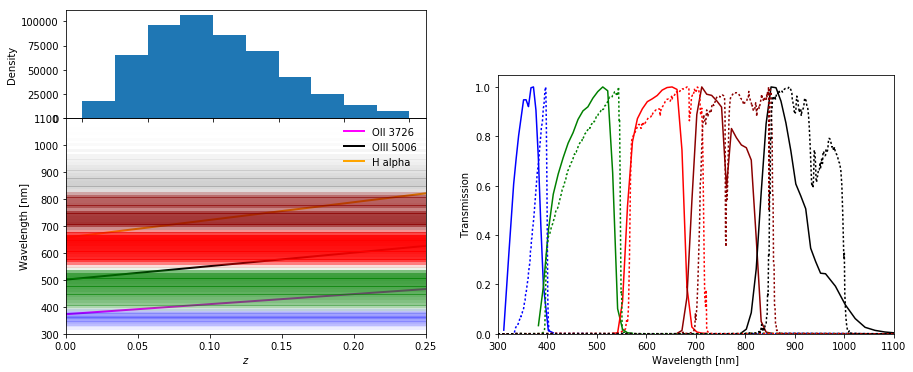

In [63]:
#What redshift range is best?
#u=302-412
#g=372-572
#r=522-722
#i=652-852
#z=782-1102

#OII = 372.6
#OII = 372.8
#OIII = 500.6
#Ha = 656.2

oii_wave = 372.6
oii_name = 'OII 3726'
oiii_wave = 500.6
oiii_name = 'OIII 5006'
ha_wave = 656.2
ha_name = 'H alpha'
waves = [oii_wave, oiii_wave, ha_wave]
names = [oii_name, oiii_name, ha_name]
line_colors = np.array(['magenta', 'black', 'orange'])
filters = np.array(['u', 'g', 'r', 'i', 'z'])
filter_colors = np.array(['blue', 'green', 'red', 'darkred', 'black'])

z_range = np.arange(0,1,0.1)
new_wave = np.zeros((len(z_range), len(waves)))
for i, name in enumerate(names):
    new_wave[:,i] = np.array([waves[i] + (waves[i] * z) for z in z_range])
    
    if i == 0:
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_axes([0.1,0.1,0.5,0.5])
    plt.plot(z_range, new_wave[:,i], '-', label=names[i], color=line_colors[i], linewidth=2)

for i, filter_name in enumerate(filters):
    filter_data = Table.read('sdss_filters.'+filter_name, format='ascii', data_start=6, \
                            names=['dum', 'filter_wave', 'transmission'])
    plt.text(0.35, filter_data['filter_wave'][9], filter_name, color='black', fontsize=15)
    for j in arange(len(filter_data['dum'])):
        this_filter_wave = filter_data['filter_wave'][j]
        this_trans = float(filter_data['transmission'][j])
        plt.plot([0,1],[this_filter_wave,this_filter_wave], alpha=this_trans/0.6, color=filter_colors[i], linewidth=3)

plt.xlim([0,0.25])
plt.ylim([300,1100])
plt.xlabel('$z$')
plt.ylabel('Wavelength [nm]')
plt.legend(frameon=False,loc=0)

#Distribution of sample redshifts
ax = fig.add_axes([0.1,0.6,0.5,0.25])
plt.hist(all_src['z'][elg], range=[0,0.25])
ax.set_xticklabels([])
plt.ylabel('Density')
#plt.yscale('log')

#Read in and plot filters
filters = np.array(['u', 'g', 'r', 'i', 'z'])
filter_colors = np.array(['blue', 'green', 'red', 'darkred', 'black'])
ax = fig.add_axes([0.7,0.1,0.55,0.6])

#SDSS (yes, again, shut up)
for i, filter_name in enumerate(filters):
    filter_data = Table.read('sdss_filters.'+filter_name, format='ascii', data_start=6, \
                            names=['dum', 'filter_wave', 'transmission'])
    this_wave = filter_data['filter_wave']
    this_trans = filter_data['transmission'] 
    plt.plot(this_wave, this_trans/np.max(this_trans), color=filter_colors[i])

#DECAM
decam_data = Table.read('DECam_filters.csv', format='ascii')
dc_wave = decam_data['wavelength']
plt.plot(dc_wave, decam_data['u']/np.max(decam_data['u']), ':', color=filter_colors[0], label='DECam')
plt.plot(dc_wave, decam_data['g']/np.max(decam_data['g']), ':', color=filter_colors[1])
plt.plot(dc_wave, decam_data['r']/np.max(decam_data['r']), ':', color=filter_colors[2])
plt.plot(dc_wave, decam_data['i']/np.max(decam_data['i']), ':', color=filter_colors[3])
plt.plot(dc_wave, decam_data['z']/np.max(decam_data['z']), ':', color=filter_colors[4])

plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission')
plt.xlim([300,1100])
plt.ylim([0,1.05])
#plt.legend()

fig.savefig('filters_vs_emissionlines.png', bbox_inches='tight')

(0, 0.65)

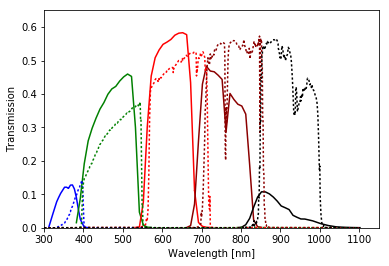